# Comparing different memory profiles 

In [2]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

## `z` computed by transforming `consensus_memory` 
`consensus_memory` is a tensor shape (n_agents, n_param, len_memory) encoding the len_memory past error signals for each parameter. Initialized with zeros.

In [3]:
n_agents = 4
n_param = 2
len_memory = 10

consensus_memory = np.zeros([n_agents, n_param, len_memory])

## Linear

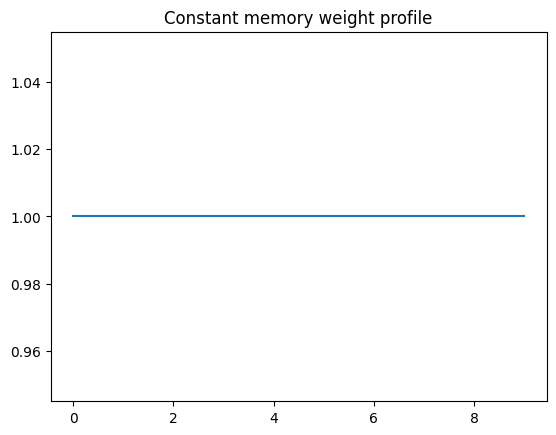

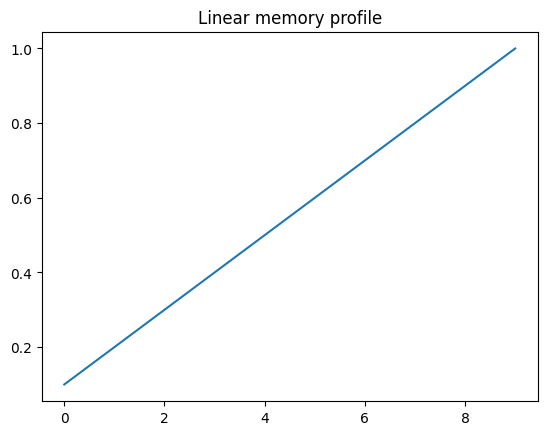

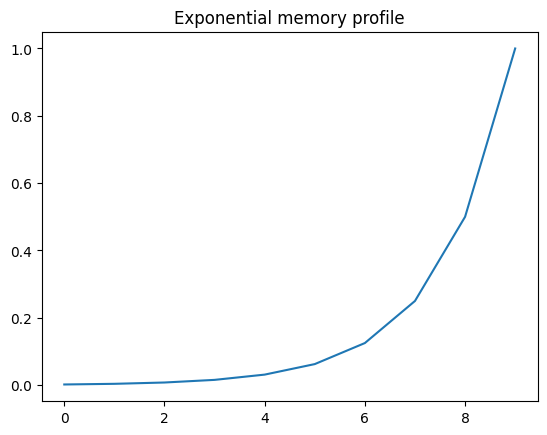

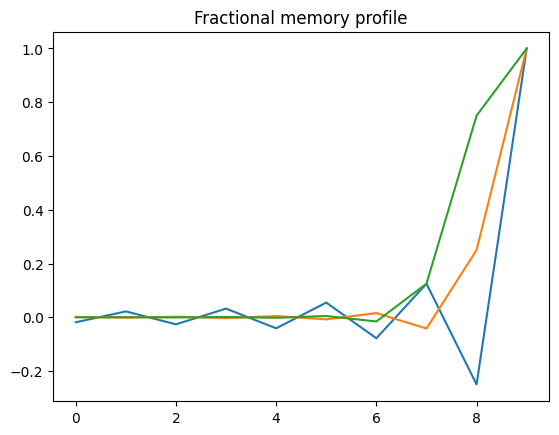

In [4]:
def constant(x): 
    con = 1
    return con


def linear(x): # slope redundant in linear, it can only hav e1 slope, dependent on len(memory)
    lin = x
    return lin

def exponential(x, b):
    assert b > 1, "Error: b must be > 1."
    exp = b ** x
    return exp

def fractional(x, _lambda): # TODO: make sure it looks like you want it to look, see the plot -> might need to flip it
    """
    _lambda: float >= 0
        The fractional order to use.
    """

    from scipy.special import gamma

    binomial_coefficient = (gamma(_lambda+1)) / (gamma(x+1) * gamma(_lambda-x+1))
    # fract = (-1) ** x * binomial_coefficient    # original factional variation -> quite funky 
    fract = binomial_coefficient

    return fract



constant_weights = np.array([constant(x) for x in range(1, len_memory+1)])

# scaling weights between 0 and 1. TODO: do this for every transformation
plt.plot(range(len(constant_weights)), constant_weights)  # I expect last element to have value 1
plt.title("Constant memory weight profile")
plt.show()

# TODO: use precisely this scaling for every function
linear_weights = np.array([linear(x) for x in range(1, len_memory+1)])

# scaling weights between 0 and 1. TODO: do this for every transformation
linear_weights = linear_weights / max(linear_weights)
plt.plot(range(len(linear_weights)), linear_weights)  # I expect last element to have value 1
plt.title("Linear memory profile")
plt.show()


exponential_weights = np.array([exponential(x, b= 2) for x in range(1, len_memory+1)])
exponential_weights = exponential_weights / max(exponential_weights)

plt.plot(range(len(exponential_weights)), exponential_weights)  # I expect last element to have value 1
plt.title("Exponential memory profile")
plt.show()

fractional_weights = np.array([fractional(x, _lambda= 0.5) for x in reversed(range(1, len_memory+1))])
fractional_weights = fractional_weights  / max(fractional_weights) 
plt.plot(range(len(fractional_weights)), fractional_weights)  # I expect last element to have value 1

fractional_weights = np.array([fractional(x, _lambda= 1.5) for x in reversed(range(1, len_memory+1))])
fractional_weights = fractional_weights / max(fractional_weights) 
plt.plot(range(len(fractional_weights)), fractional_weights)  # I expect last element to have value 1


fractional_weights = np.array([fractional(x, _lambda= 2.5) for x in reversed(range(1, len_memory+1))])
fractional_weights = fractional_weights / max(fractional_weights) 
plt.plot(range(len(fractional_weights)), fractional_weights)  # I expect last element to have value 1

# fractional_weights = np.array([fractional(x, _lambda= 2.5) for x in reversed(range(1, len_memory+1))])
# fractional_weights = fractional_weights / max(fractional_weights)  
# plt.plot(range(len(fractional_weights)), fractional_weights)  # I expect last element to have value 1

# fractional_weights = np.array([fractional(x, _lambda= 3.5) for x in reversed(range(1, len_memory+1))])
# fractional_weights = fractional_weights / max(fractional_weights)  
# plt.plot(range(len(fractional_weights)), fractional_weights)  # I expect last element to have value 1


plt.title("Fractional memory profile")
plt.show()


